# **INTRODUCTION**

This project tries to understand what are the factors contributing to mental health of a person. The dataset is from a survey conducted that measures attitudes towards mental health and the frequency of mental health disorders in the tech workspace. Mental health affects your emotional,psychological and social well being. It affects how we think feel, and act. It also helps determine how we handle stress, relate to others, and make choices.In the work space communication and inclusion are key skills for successful high performing teams or employees. The impact of mental health to an organization can mean an increase of abssent days from work and a decrease in productivity and engagement.Accordind to research, employees with depression will miss an estimated 35 million work days a year due to mental illness. Those workers experiencing unresolved depression are estimated to encounter a 35% drop in their productivity, costing employers $105 billion dollars each years

# **Objectives**

1. Understand the factors contributing to mental health of a person
2. Perform a detailed and orderly EDA of mental health in tech space.
3. Come up with a model which best evaluates the mental health in tech space

# **Importing the necessary files**

In [ ]:

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io
import seaborn as sns
import missingno as mn
from bokeh.io import output_notebook
from bokeh import models, palettes, transform
from bokeh.plotting import figure,show
import pandas_profiling
import pydotplus
from scipy.cluster import hierarchy
from sklearn import decomposition, preprocessing, cluster, tree
from sklearn import cluster,decomposition,pipeline,preprocessing
from yellowbrick.cluster.silhouette import SilhouetteVisualizer
import statsmodels
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder

In [ ]:
#importing file from the google drive
from google.colab import drive
drive.mount('/content/gdrive')

!ls /content/gdrive/MyDrive/PDS/mental.csv

from google.colab import auth
auth.authenticate_user()
from pydrive.drive import GoogleDrive
from pydrive.auth import GoogleAuth
from oauth2client.client import GoogleCredentials
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#myfile = drive.CreateFile({'id': '!!!YOUR FILE ID!!!'})
#File ID is the link you get when sharing a document
myfile = drive.CreateFile({'id': 'https://docs.google.com/spreadsheets/d/1jdIU9jkkao46xPpRBYFZT9_m-zNJ_3UIyhdWf7RqCV0/edit?usp=sharing'})

df=pd.read_csv('/content/gdrive/MyDrive/PDS/mental.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/PDS/mental.csv


In [ ]:
#importing file from the desktop
#import io
#from google.colab import files
#uploaded=files.upload()
#df=pd.read_csv(io.BytesIO(uploaded['mental.csv']))

# Understanding the data 

In [ ]:

#The head function displays the first 5 rows of the dataset
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [ ]:
# The tail function displays the last five columns of the dataset
df.tail()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,No,Yes,No,No,No,No,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,Yes,Yes,Yes,Yes,No,No,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,No,Yes,Yes,Yes,No,No,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,Yes,Yes,No,Yes,No,No,Don't know,Don't know,Yes,No,No,No,No,No,No,No,NaN
1258,2016-02-01 23:04:31,25,Male,United States,IL,No,Yes,Yes,Sometimes,26-100,No,No,Yes,Yes,No,No,Yes,Don't know,Maybe,No,Some of them,No,No,No,Don't know,No,NaN


In [ ]:
# The shape function displays the number of rows and columns in the dataset
# from that fuction we can tell that the mental data has 1259 rows and 27 columns or variables
df.shape

(1259, 27)

In [ ]:
# dtypes function displays the data type of each and every column
# we can observe that out of the 27 columns, 26 columns are of object type while 1 column is of integer type
df.dtypes

Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object

In [ ]:
#columns is a function which displays all  the columns in the dataset
df.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [ ]:
# isna(), a function which checks whether the data has any missing or null values
# where the fucntion displays True means there is a missing value in that column
df.isna()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1255,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1256,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1257,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [ ]:
#isna().sum() is a fuction which displays the summation of the missing values in each column of the dataset
df.isna().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [ ]:
# representing the missing values as a percentage
# we can observe that the comments section contains the most missing values probably because it was an optional column to fill when the data was being collected
df.isna().mean()*100

Timestamp                     0.000000
Age                           0.000000
Gender                        0.000000
Country                       0.000000
state                        40.905481
self_employed                 1.429706
family_history                0.000000
treatment                     0.000000
work_interfere               20.969023
no_employees                  0.000000
remote_work                   0.000000
tech_company                  0.000000
benefits                      0.000000
care_options                  0.000000
wellness_program              0.000000
seek_help                     0.000000
anonymity                     0.000000
leave                         0.000000
mental_health_consequence     0.000000
phys_health_consequence       0.000000
coworkers                     0.000000
supervisor                    0.000000
mental_health_interview       0.000000
phys_health_interview         0.000000
mental_vs_physical            0.000000
obs_consequence          

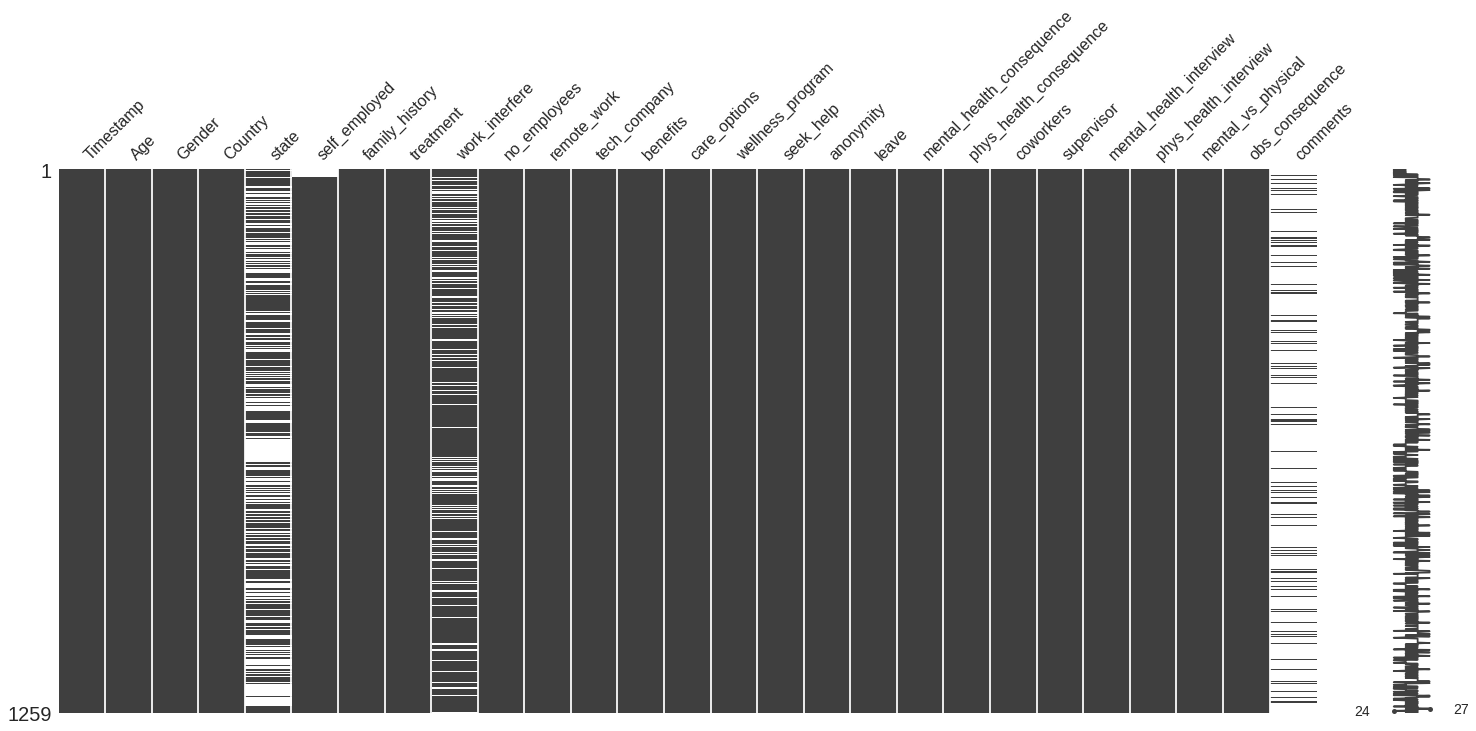

In [ ]:
#visualing the missing values using a matrix
mn.matrix(df)

In [ ]:
# the describe function highlights the summary statistics of the numerical values of the dataset
df.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


# **Data cleaning and dealing with missing values**


In [ ]:
print(df['Country'].value_counts())
print('\n\n')
print(df['state'].unique())

United States             751
United Kingdom            185
Canada                     72
Germany                    45
Ireland                    27
Netherlands                27
Australia                  21
France                     13
India                      10
New Zealand                 8
Switzerland                 7
Sweden                      7
Poland                      7
Italy                       7
Brazil                      6
South Africa                6
Belgium                     6
Israel                      5
Singapore                   4
Bulgaria                    4
Russia                      3
Mexico                      3
Austria                     3
Finland                     3
Portugal                    2
Colombia                    2
Croatia                     2
Denmark                     2
Greece                      2
Nigeria                     1
Romania                     1
Thailand                    1
Norway                      1
Japan     

from the above we can conclude that most of the states only apply to the United States and hence not useful to the other countries.
US has the highest respondents and hence it will be unfair to conclude that it has the hightest number of mental health cases 

In [ ]:
# timestamp columns contain the date, year, month and time when the data was collected and hence its not necessary and we will drop it
# we will also drop the comments columns, the country and state

df.drop(columns=['Timestamp','Country','state','comments'],inplace=True)

In [ ]:
#inspecting the age column
print(df['Age'].unique())
#we can observe that the age column contains outliers and negative values

[         37          44          32          31          33          35
          39          42          23          29          36          27
          46          41          34          30          40          38
          50          24          18          28          26          22
          19          25          45          21         -29          43
          56          60          54         329          55 99999999999
          48          20          57          58          47          62
          51          65          49       -1726           5          53
          61           8          11          -1          72]


In [ ]:
# we drop the entries which are more than 100 years and less than 0
df.drop(df[df['Age'] < 0].index,inplace=True)
df.drop(df[df['Age'] > 100].index,inplace=True)



In [ ]:
df['Age'].value_counts()

29    85
32    82
26    75
27    71
33    70
28    68
31    67
34    65
30    63
25    61
35    55
23    51
24    46
37    43
38    39
36    37
39    33
40    33
43    28
41    21
22    21
42    20
21    16
45    12
46    12
44    11
19     9
18     7
48     6
50     6
20     6
51     5
49     4
56     4
55     3
57     3
54     3
47     2
60     2
11     1
8      1
72     1
65     1
53     1
58     1
61     1
62     1
5      1
Name: Age, dtype: int64

In [ ]:
# inspecting the gender column
df['Gender'].unique()
# we can observe that column contains different entries for the gender column

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'Enby', 'fluid',
       'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [ ]:
# we combine entries like Female,F,Cis Female to mean Female
# we combine entries like Male,Male-ish and Cis Male to mean Male
# the rest of the entries we put them under the 'Others' category
df['Gender'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male',
                     'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)',
                      'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make'], 'Male', inplace = True)

df['Gender'].replace(['Female ', 'female', 'F', 'f', 'Woman', 'Female',
                     'femail', 'Cis Female', 'cis-female/femme', 'Femake', 'Female (cis)',
                     'woman'], 'Female', inplace = True)

df["Gender"].replace(['Female (trans)', 'queer/she/they', 'non-binary',
                     'fluid', 'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous',
                      'Agender', 'A little about you', 'Nah', 'All',
                      'ostensibly male, unsure what that really means',
                      'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?',
                      'Guy (-ish) ^_^', 'Trans woman'], 'Other', inplace = True)

df['Gender'].value_counts()

Male      988
Female    247
Other      19
Name: Gender, dtype: int64

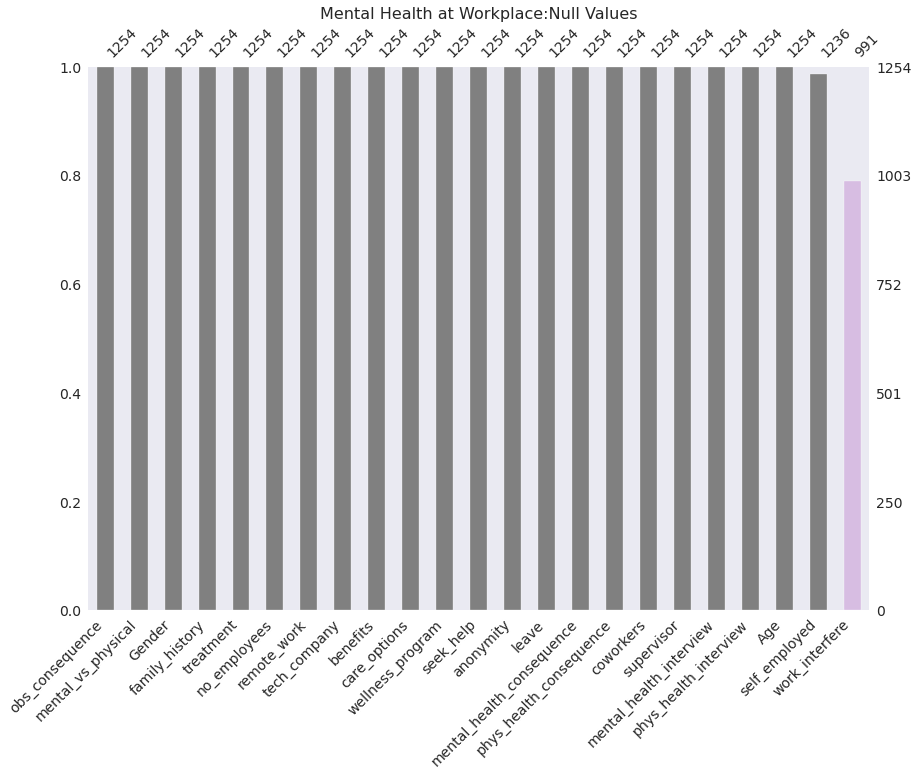

In [ ]:
sns.set_style('dark')
color=['grey','grey','grey','grey','grey','grey','grey','grey','grey','grey','grey','grey', 'grey','grey','grey','grey','grey','grey', 'grey','grey','grey','grey','#D7BDE2']
mn.bar(df,fontsize=14,sort='descending',color=color,figsize=(14,10))
plt.title("Mental Health at Workplace:Null Values",fontsize=16)
plt.show()

In [ ]:
#from the bar chart above, we still have two columns with null values, ie, self_employed and work_interfere
#for the work_interfere column, fill the missing values with don't know
df['work_interfere']=df['work_interfere'].fillna('don\'t know')
df['work_interfere'].unique()

array(['Often', 'Rarely', 'Never', 'Sometimes', "don't know"],
      dtype=object)

In [ ]:
df['self_employed']=df['self_employed'].fillna('No')
df['self_employed'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
#confirming whether there is any column again with missing value
df.isna().sum()

Age                          0
Gender                       0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

# **Exploratory Data Analysis**

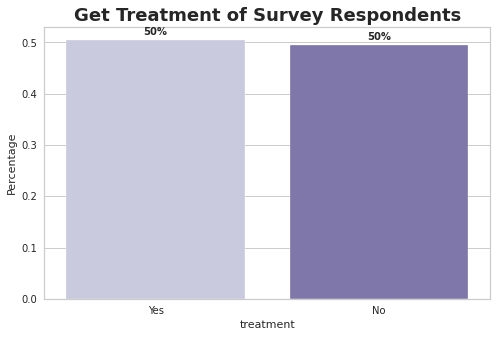

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize = (8,5))
plt.title('Get Treatment of Survey Respondents', fontsize=18, fontweight='bold')
eda_percentage = df['treatment'].value_counts(normalize = True).rename_axis('treatment').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'treatment', y = 'Percentage', data= eda_percentage.head(10), palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

The above graph represents our target varibale,where 50% of the respodents are willing to seek for mental health care treatment

No handles with labels found to put in legend.
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



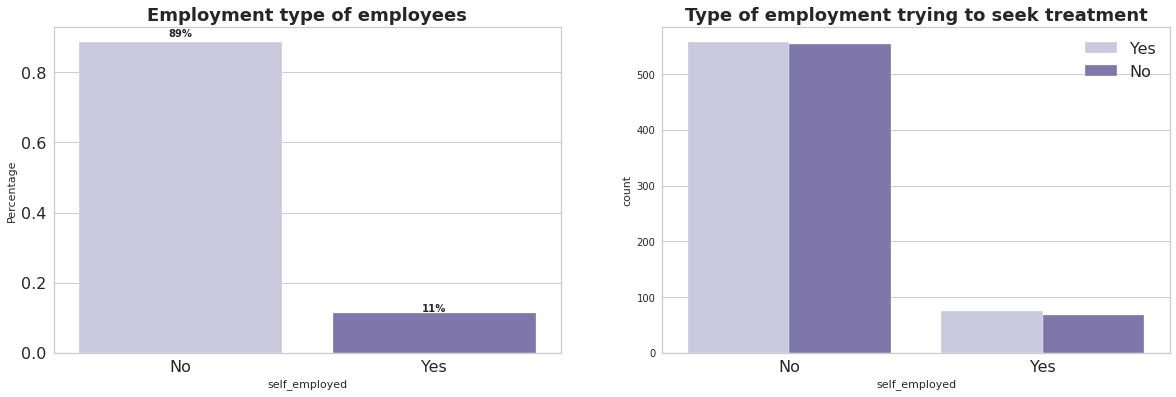

In [ ]:
#Exploring individual columns and what they mean
#self_employed column
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage=df['self_employed'].value_counts(normalize=True).rename_axis('self_employed').reset_index(name='Percentage')
ax=sns.barplot(x='self_employed',y='Percentage',data=eda_percentage,palette='Purples')
for p in ax.patches:
    width=p.get_width()
    height=p.get_height()
    x,y =p.get_xy()
    ax.annotate(f'{height:.0%}',(x+width/2,y+height*1.02),ha='center',fontweight='bold')
plt.title('Employment type of employees',fontsize=18,fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(df['self_employed'],hue=df['treatment'],palette='Purples')
plt.title('Type of employment trying to seek treatment',fontsize=18,fontweight='bold')
plt.xticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(fontsize=16)

plt.show()

Majority of the people who filled the survey are empoyed, accounting for 88% of the total respondents.However, the number of people seeking treatment in both types of employment is more or less similar

No handles with labels found to put in legend.
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



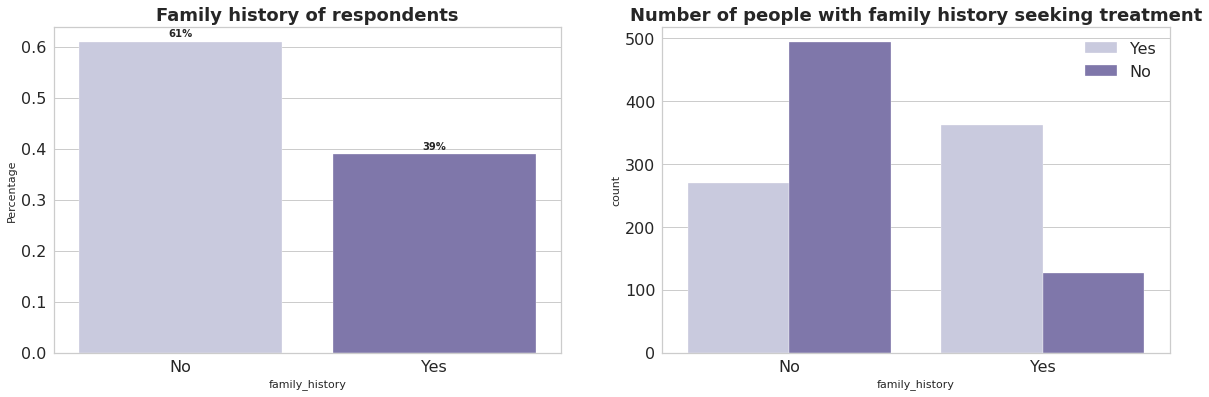

In [ ]:
#family_history column
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage=df['family_history'].value_counts(normalize=True).rename_axis('family_history').reset_index(name='Percentage')
ax=sns.barplot(x='family_history',y='Percentage',data=eda_percentage,palette='Purples')
for p in ax.patches:
    width=p.get_width()
    height=p.get_height()
    x,y=p.get_xy()
    ax.annotate(f'{height:.0%}',(x+width/2,y+height*1.02),ha='center',fontweight='bold')
plt.title('Family history of respondents',fontsize=18,fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(df['family_history'],hue=df['treatment'],palette='Purples')
plt.title("Number of people with family history seeking treatment",fontsize=18,fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
                
plt.show()

from the graph above, 61% of the respondents have no family history of mental health related illnesses. We have a higher  number of people with family history of mental health illness seeking treatment as compared to respondents who have no history of mental health seeking treatment.

No handles with labels found to put in legend.
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



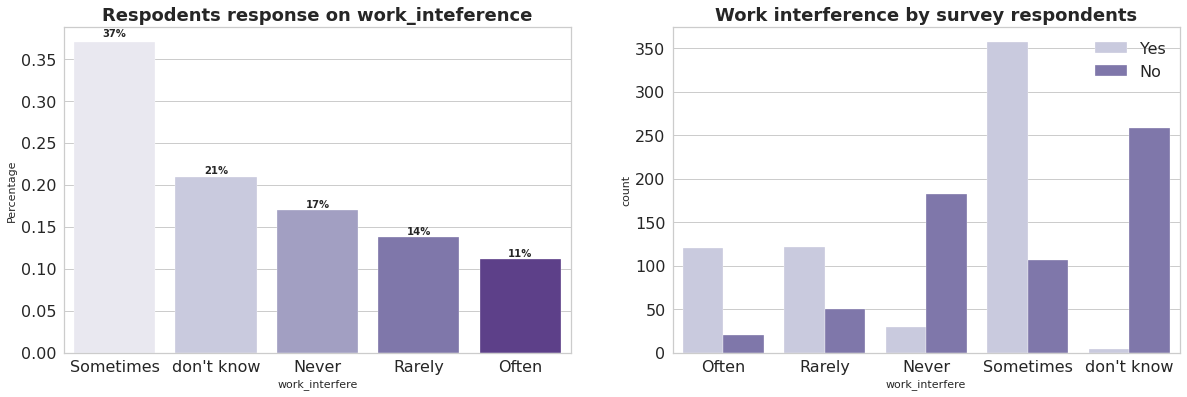

In [ ]:
# work_interference column
# does mental health condition intefere with your work?
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage=df['work_interfere'].value_counts(normalize=True).rename_axis('work_interfere').reset_index(name='Percentage')
ax=sns.barplot(x='work_interfere',y='Percentage',data=eda_percentage,palette='Purples')
for p in ax.patches:
    width=p.get_width()
    height=p.get_height()
    x,y=p.get_xy()
    ax.annotate(f'{height:.0%}',(x+width/2,y+height*1.02),ha='center',fontweight='bold')
plt.title('Respodents response on work_inteference',fontsize=18,fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(df['work_interfere'],hue=df['treatment'],palette='Purples')
plt.title('Work interference by survey respondents',fontsize=18,fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

37% of the respondents indicated that work sometimes inteferes with their mental health. On the second graph, the number of people who have work intefering with their mental health form a great number of people seekig treatment.

No handles with labels found to put in legend.
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



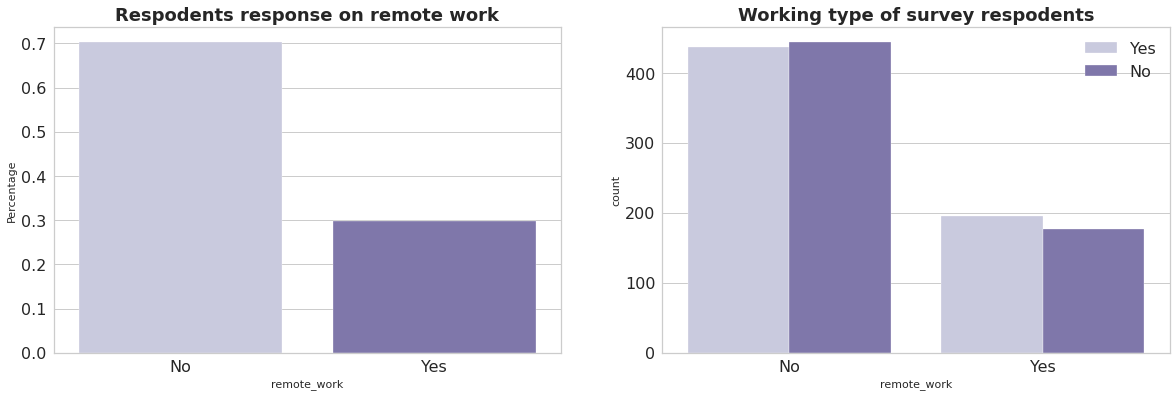

In [ ]:
#remote_work column
#Do you work remotely outside the office most of the time?
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage=df['remote_work'].value_counts(normalize=True).rename_axis('remote_work').reset_index(name='Percentage')
sns.barplot(x='remote_work',y='Percentage',data=eda_percentage,palette='Purples')
for p in ax.patches:
    width=p.get_width()
    height=p.get_height()
    x,y=p.get_xy()
    ax.annotate(f'{height:.0%}',(x+width/2,y+height*1.02),ha='center',fontweight='bold')
plt.title('Respodents response on remote work',fontsize=18,fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(df['remote_work'],hue=df['treatment'],palette='Purples')
plt.title('Working type of survey respodents',fontsize=18,fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

from Graph 1, majority of respondents don't work remotely meaning most of the mental health illnesses are office related. In the second graph,the number of people seeking treatment in both categories is almost the same and hence does not affect our target variable

No handles with labels found to put in legend.
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



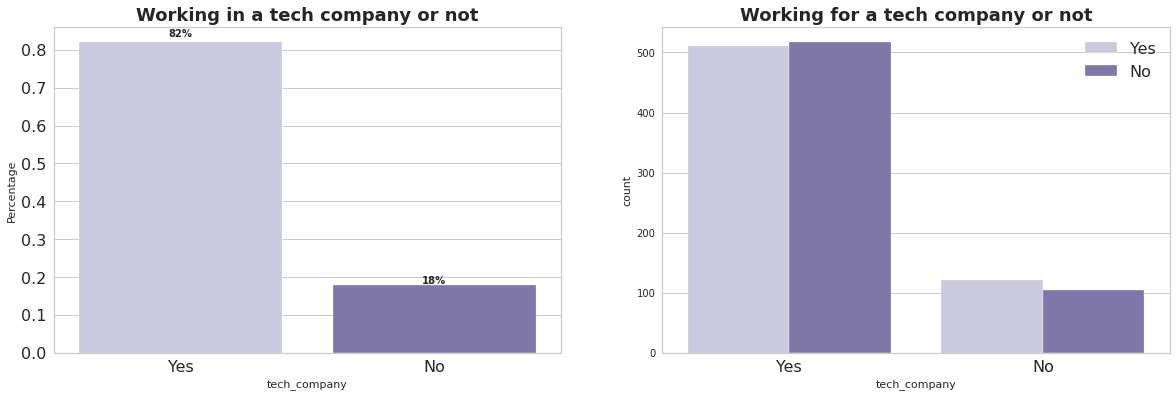

In [ ]:
#tech_company
#is your employer primariry a tech company or organization?
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage=df['tech_company'].value_counts(normalize=True).rename_axis('tech_company').reset_index(name='Percentage')
ax=sns.barplot(x='tech_company',y='Percentage',data=eda_percentage,palette='Purples')
for p in ax.patches:
    width=p.get_width()
    height=p.get_height()
    x,y =p.get_xy()
    ax.annotate(f'{height:.0%}',(x+width/2,y+height*1.02),ha='center',fontweight='bold')
plt.title('Working in a tech company or not',fontsize=18,fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(df['tech_company'],hue=df['treatment'],palette='Purples')
plt.title('Working for a tech company or not',fontsize=18,fontweight='bold')
plt.xticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(fontsize=16)

plt.show()

82% of the respondents work for  a tech company. In the second graph, the number of people seeking treatment in both categories is almost the same and therefore has less effect on our target variable

No handles with labels found to put in legend.
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



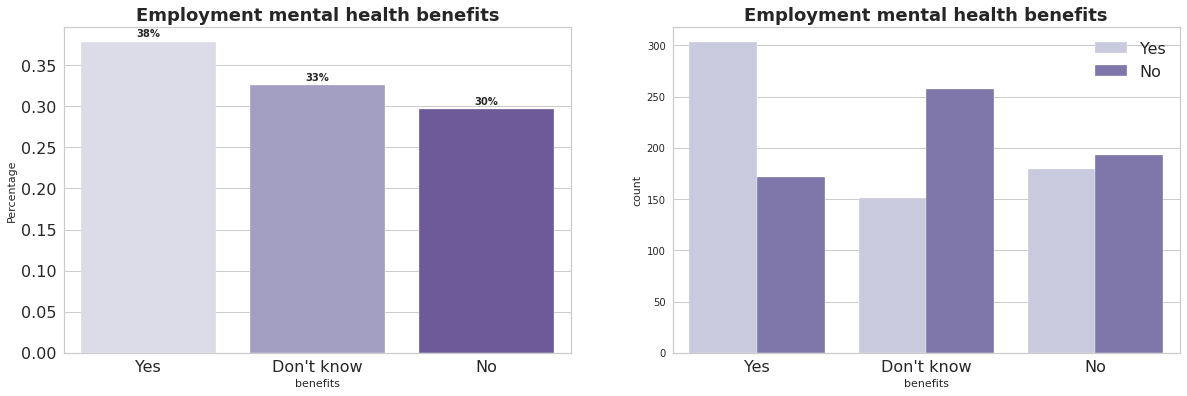

In [ ]:
#benefits
#does your employer provide menntal health benefits?
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage=df['benefits'].value_counts(normalize=True).rename_axis('benefits').reset_index(name='Percentage')
ax=sns.barplot(x='benefits',y='Percentage',data=eda_percentage,palette='Purples')
for p in ax.patches:
    width=p.get_width()
    height=p.get_height()
    x,y =p.get_xy()
    ax.annotate(f'{height:.0%}',(x+width/2,y+height*1.02),ha='center',fontweight='bold')
plt.title('Employment mental health benefits',fontsize=18,fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(df['benefits'],hue=df['treatment'],palette='Purples')
plt.title('Employment mental health benefits',fontsize=18,fontweight='bold')
plt.xticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(fontsize=16)

plt.show()

38% of the respondents have access to health benefits provided by their employer. A significant number don't know whether their employer provides such benefits. In the second graph, the respondents who said yes sought for treatment, while those who answered no, also have a significant of them seeking for treatment

No handles with labels found to put in legend.
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



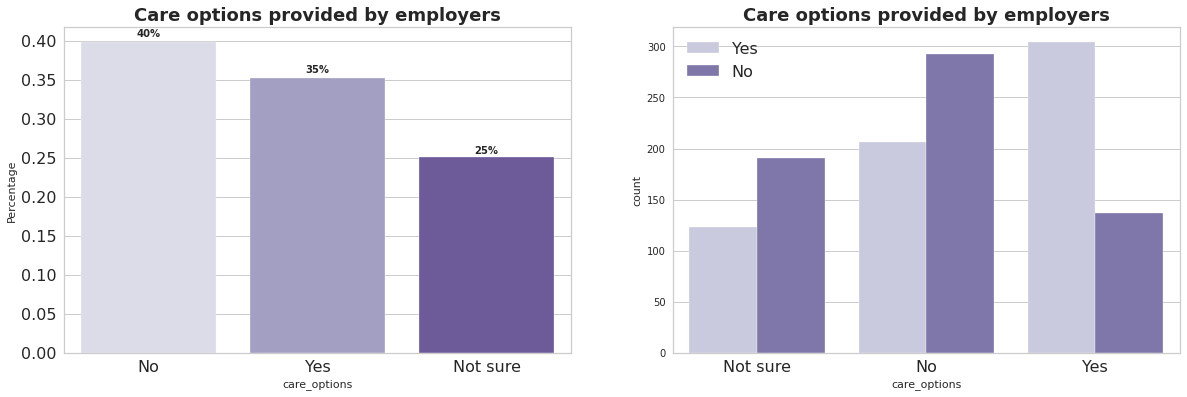

In [ ]:
#care_options
#do you know the health care options for mental  provided by the employer?
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage=df['care_options'].value_counts(normalize=True).rename_axis('care_options').reset_index(name='Percentage')
ax=sns.barplot(x='care_options',y='Percentage',data=eda_percentage,palette='Purples')
for p in ax.patches:
    width=p.get_width()
    height=p.get_height()
    x,y =p.get_xy()
    ax.annotate(f'{height:.0%}',(x+width/2,y+height*1.02),ha='center',fontweight='bold')
plt.title('Care options provided by employers',fontsize=18,fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(df['care_options'],hue=df['treatment'],palette='Purples')
plt.title('Care options provided by employers',fontsize=18,fontweight='bold')
plt.xticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(fontsize=16)

plt.show()

Of the respondents, 40% do not the care options provided by the employers

No handles with labels found to put in legend.
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



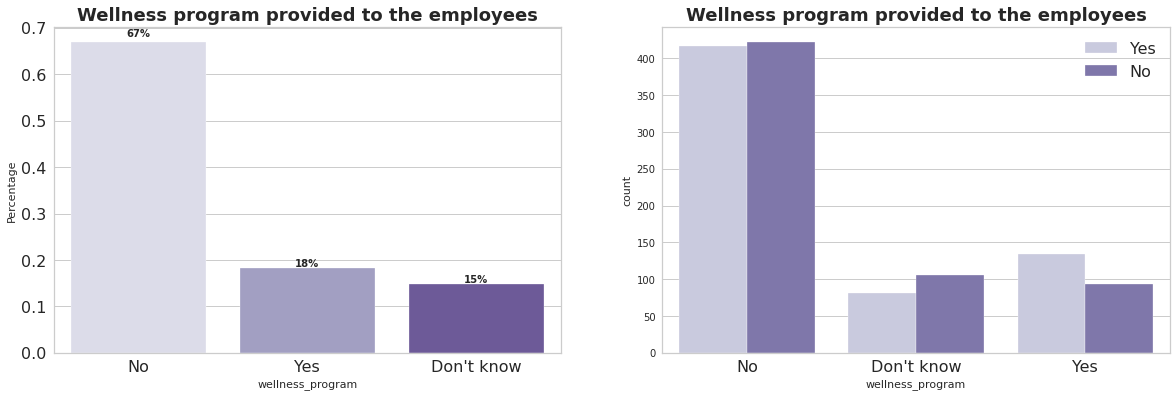

In [ ]:
#wellness_program
#has your employer ever discussed mental health as part of the wellness program?
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage=df['wellness_program'].value_counts(normalize=True).rename_axis('wellness_program').reset_index(name='Percentage')
ax=sns.barplot(x='wellness_program',y='Percentage',data=eda_percentage,palette='Purples')
for p in ax.patches:
    width=p.get_width()
    height=p.get_height()
    x,y =p.get_xy()
    ax.annotate(f'{height:.0%}',(x+width/2,y+height*1.02),ha='center',fontweight='bold')
plt.title('Wellness program provided to the employees',fontsize=18,fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(df['wellness_program'],hue=df['treatment'],palette='Purples')
plt.title('Wellness program provided to the employees',fontsize=18,fontweight='bold')
plt.xticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(fontsize=16)

plt.show()


Of the respondents, 67% of them do not have mental health included in their wellness program. 18% of those said yes to being part of a wellness program and from those, a significant number of them want to seek treatment

No handles with labels found to put in legend.
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



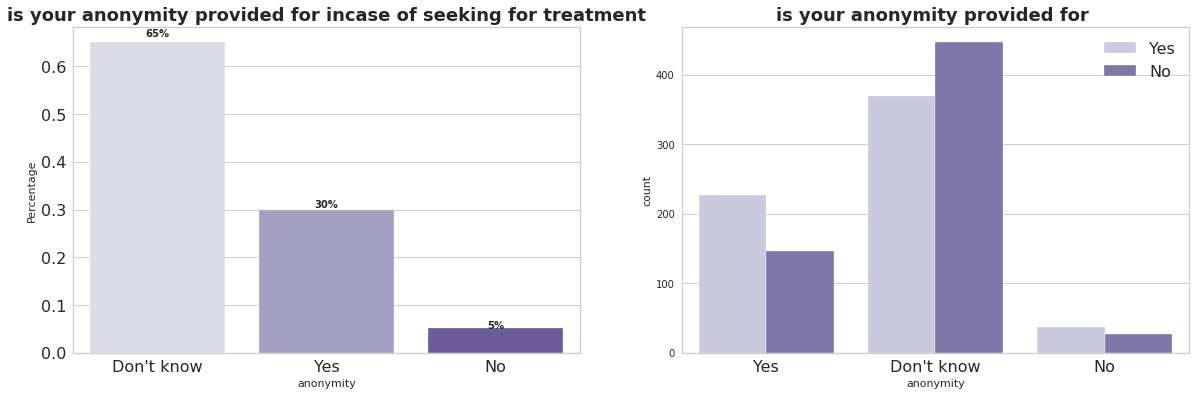

In [ ]:
#anonymity
#is your privacy provided for if you decide to seek for mental health benefits or treatment
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage=df['anonymity'].value_counts(normalize=True).rename_axis('anonymity').reset_index(name='Percentage')
ax=sns.barplot(x='anonymity',y='Percentage',data=eda_percentage,palette='Purples')
for p in ax.patches:
    width=p.get_width()
    height=p.get_height()
    x,y =p.get_xy()
    ax.annotate(f'{height:.0%}',(x+width/2,y+height*1.02),ha='center',fontweight='bold')
plt.title('is your anonymity provided for incase of seeking for treatment',fontsize=18,fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(df['anonymity'],hue=df['treatment'],palette='Purples')
plt.title('is your anonymity provided for ',fontsize=18,fontweight='bold')
plt.xticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(fontsize=16)

plt.show()

Around 65% of the respondents do not know whether there employers provided anonymity while 30% of the respodents had their employers provide anonymity of their condition
Out of the people who answered yes, majority of them were seeking help regarding their mental health status

In [ ]:
#Encoding the categorical variables using LabelEncoder
object_cols = ['Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence']
label_encoder = LabelEncoder()
for col in object_cols:
    label_encoder.fit(df[col])
    df[col] = label_encoder.transform(df[col])


In [ ]:
df['treatment'].value_counts()
#the target variable has almost the equal entries of the category

1    633
0    621
Name: treatment, dtype: int64

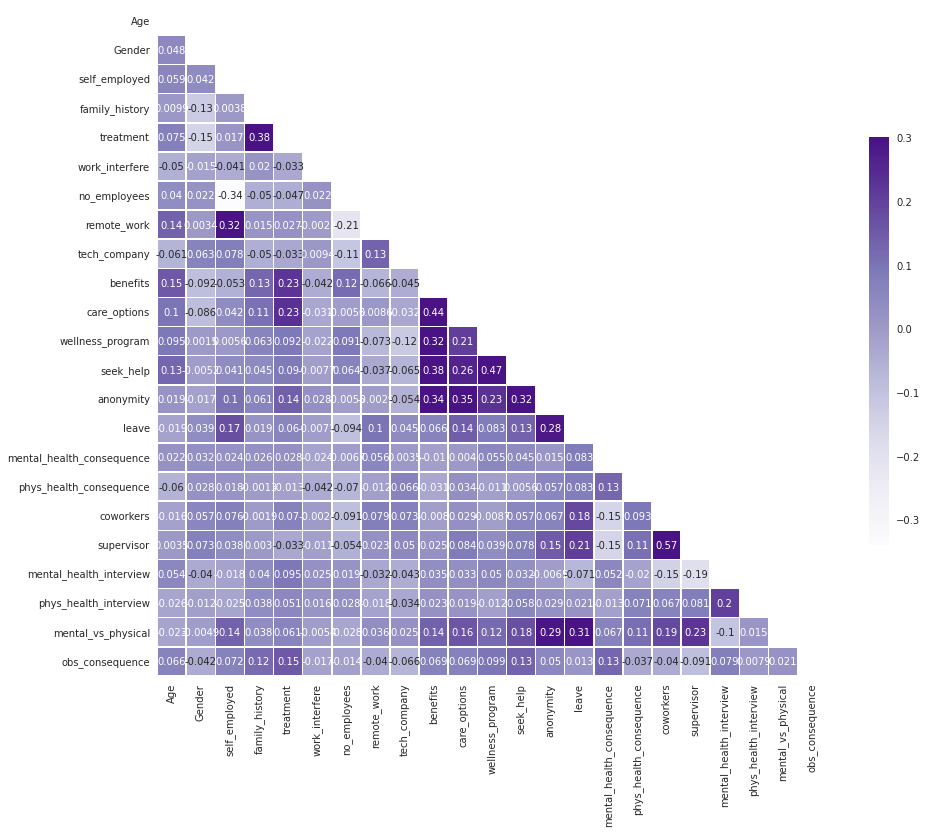

In [ ]:
#compute correlation matrix
corr=df.corr()
mask=np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f,ax=plt.subplots(figsize=(15,15))
#heatmap
sns.heatmap(corr, mask=mask, cmap='Purples', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)


In [ ]:
#Evaluating models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, plot_roc_curve, confusion_matrix, classification_report, precision_recall_curve, auc
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
import xgboost as xgb
from sklearn import metrics

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('treatment', axis = 1)
y = df['treatment']

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   stratify = y,
                                                    test_size = 0.3,
                                                   random_state = 101)

In [ ]:
key = ['LogisticRegression','KNeighborsClassifier','DecisionTreeClassifier',
       'RandomForestClassifier','GradientBoostingClassifier','AdaBoostClassifier','XGBClassifier']
value = [LogisticRegression(), KNeighborsClassifier(n_neighbors = 2, weights ='uniform'),
         DecisionTreeClassifier(random_state=10), RandomForestClassifier(n_estimators=60, random_state=0), 
         GradientBoostingClassifier(random_state=20), AdaBoostClassifier(), xgb.XGBClassifier(random_state=0,booster="gbtree")]
models = dict(zip(key,value))
models

{'AdaBoostClassifier': AdaBoostClassifier(),
 'DecisionTreeClassifier': DecisionTreeClassifier(random_state=10),
 'GradientBoostingClassifier': GradientBoostingClassifier(random_state=20),
 'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=2),
 'LogisticRegression': LogisticRegression(),
 'RandomForestClassifier': RandomForestClassifier(n_estimators=60, random_state=0),
 'XGBClassifier': XGBClassifier()}

In [ ]:
predicted =[]
for name,algo in models.items():
    model=algo
    model.fit(X_train,y_train)
    predict = model.predict(X_test)
    acc = accuracy_score(y_test, predict)
    predicted.append(acc)
    print(name,acc)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression 0.6816976127320955
KNeighborsClassifier 0.6286472148541115
DecisionTreeClassifier 0.76657824933687
RandomForestClassifier 0.8037135278514589
GradientBoostingClassifier 0.8143236074270557
AdaBoostClassifier 0.8116710875331565
XGBClassifier 0.8090185676392573


Text(0.5, 1.0, 'Plotting the Model Accuracies')

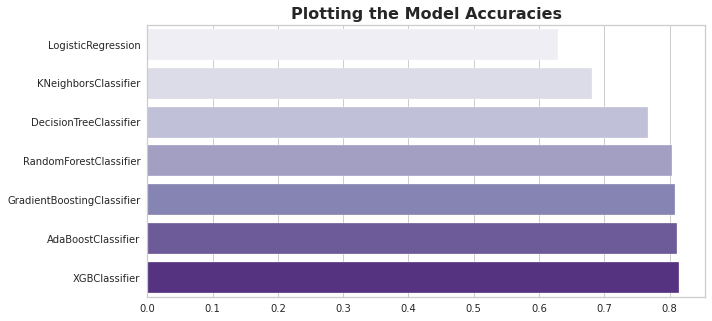

In [ ]:
plt.figure(figsize = (10,5))
ax = sns.barplot(x = predicted, y = key, palette='Purples', order=predicted.sort())
plt.title("Plotting the Model Accuracies", fontsize=16, fontweight="bold")

Text(33.0, 0.5, 'Actual')

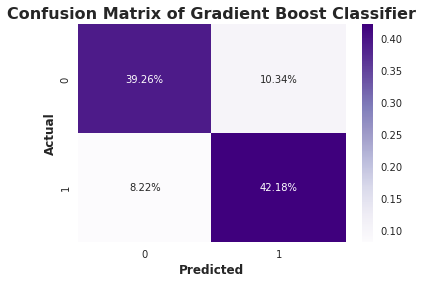

In [ ]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
pred = gbc.predict(X_test)
cf_matrix = confusion_matrix(y_test, pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Purples')
plt.title('Confusion Matrix of Gradient Boost Classifier', fontweight='bold', fontsize=16)
plt.xlabel('Predicted', fontweight='bold', fontsize=12)
plt.ylabel('Actual', fontweight='bold', fontsize=12)

From the confusion matrix of the gradient boost classifier above we can conlude that 42.18% of the respodents of the survey are likely to seek for treatment for mental health realated illnesses in the tech sector


## Conclusion

Research has shown that people working in the tech sector go through alot in their places of work. This include the preasure to deliver especially because they are the backbone of many institutions. This analysis  has strengthened  my thoughts too, that many employees in the tech sector are going through mental health issues and more sensitization needs to be done in the work environment to help employees with such issues. Majority of the employers do not provide mental health cover and hence that needs to be factored in the medical cover by employers because that is part of the journey of healing of employees with such conditions. Employers need to pay attention to the isssues of mental health to their employees. This will ensure that they reduce the number of hours and increase the output of their organisations by having employees in sound mind.


The most important part of the analysis for me was the exploratory data analysis.I got to compare the predictor variable with the other variables and just see how they affect how respodents respodent to treatment as regards to mental health illnesses

# **Recommendations**

Research shows that employees who go through mental health first aid have increased awareness of mental health among themselves and their colleagues. This allows them to be aware of what are the causes and triggers of mental health among themselve and colleagues and what resources are available for treatment. Employers can also offer competitive packages for employees who go through mental health issues.These packages can include wellness programs that focus on mental and physical wellness. They can also offer insurance and flexible working schedules for people going through such conditions. Organisations should also include mental health programs in their organisations by having pyschiatrists on board. They should also provide and environment where employees are able to speak and express their mental health issues without being victimised.